# Régression multiple 

Dans ce notebook l'exemple qui nous servira à comprendre la régression multiple avec R est une étude sur le poids de naissance des bébés.


Il s'agit d'une enquête concernant les facteurs de risque associés au faible poids de naissance de nourrissons (données collectées au centre médical de Baystate dans le Massachusetts pendant l'année 1986). Le faible poids de naissance est un événement qui intéresse les médecins depuis plusieurs années en raison du taux de mortalité infantile et du taux d'anomalies infantiles très élevés chez les nourrissons de faible poids. Le comportement d'une femme pendant la grossesse (régime alimentaire, habitudes tabagiques...) peut altérer de façon importante les chances de mener la grossesse à terme, et par conséquent, de donner naissance à un enfant de poids normal. Le fichier de données contient les informations sur 189 femmes venant consulter dans le centre médical.  Les variables sont :
- le poids de naissance du bébé (en grammes) (**BWT** = *birth weight*),
- l'âge de la mère (**AGE**),
- le poids de la mère juste avant le début de grossesse (en livres) (**LWT** = *last weight*)
- le tabagisme durant la grossesse (oui=1; non=0) (**SMOKE**)

Nous considérons le modèle linéaire suivant:
$$\text{BWT} = \beta_0 + \beta_1\text{AGE} + \beta_2\text{LWT}+\beta_3\text{SMOKE}+\varepsilon.$$

Commençons par importer les données sous R :

In [1]:
naiss <- read.table('poids_naiss.txt',header=T,sep=':')
head(naiss)
attach(naiss)

BWT,AGE,LWT,SMOKE
2523,19,182,0
2551,33,155,0
2557,20,105,1
2594,21,108,1
2600,18,107,1
2622,21,124,0


Avant d'estimer les paramètres, nous calculons la matrice de corrélation et nous présentons un diagramme de dispersion de toutes les paires de ces variables. Ceci   permet de visualiser la relation entre la variable à expliquer et chacune des variables explicatives et de juger de la corrélation entre les variables explicatives. 

,BWT,AGE,LWT,SMOKE
BWT,1.00000000,0.08986639,0.18578871,-0.18911300
AGE,0.08986639,1.00000000,0.18007315,-0.04434618
LWT,0.18578871,0.18007315,1.00000000,-0.04417908
SMOKE,-0.18911300,-0.04434618,-0.04417908,1.00000000


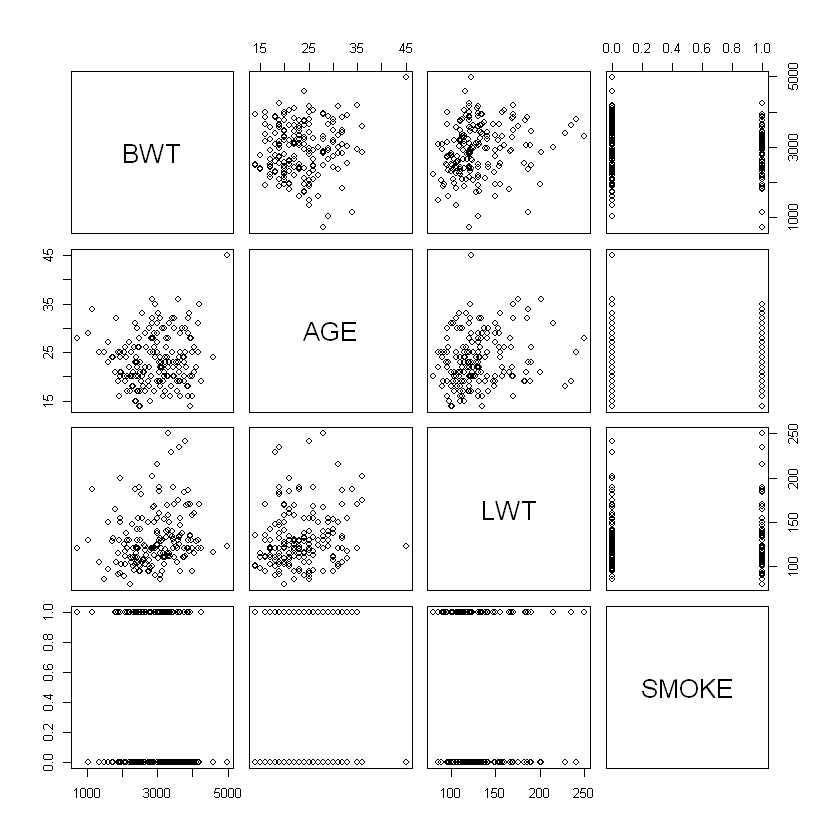

In [2]:
cor(naiss)
pairs(naiss) 

### Estimation des paramètres

Comme en régression linéaire simple, nous estimons le modèle par la fonction **lm**:

In [3]:
mod1 <- lm(BWT ~ AGE+LWT+SMOKE)
mod1


Call:
lm(formula = BWT ~ AGE + LWT + SMOKE)

Coefficients:
(Intercept)          AGE          LWT        SMOKE  
   2362.720        7.093        4.019     -267.213  


Il existe une écriture plus rapide pour définir un modèle linéaire avec toutes les variables d'un dataframe :

In [4]:
mod1 <- lm(BWT~.,data=naiss)
mod1


Call:
lm(formula = BWT ~ ., data = naiss)

Coefficients:
(Intercept)          AGE          LWT        SMOKE  
   2362.720        7.093        4.019     -267.213  


### Représentation graphique

La dimension des données étant trop élevée, on ne peut plus  représenter l'ensemble des données et la fonction de régression dans un seul graphique. Mais on peut faire des représentations graphiques variable par variable.

Notons qu'on peut couper la fenêtre graphique en plusieurs partie par l'instruction **par(mfrow=c(m,n))** afin de tracer **m\*n** graphiques dans une fenêtre (organisée dans une matrice de taille **m**x**n**)

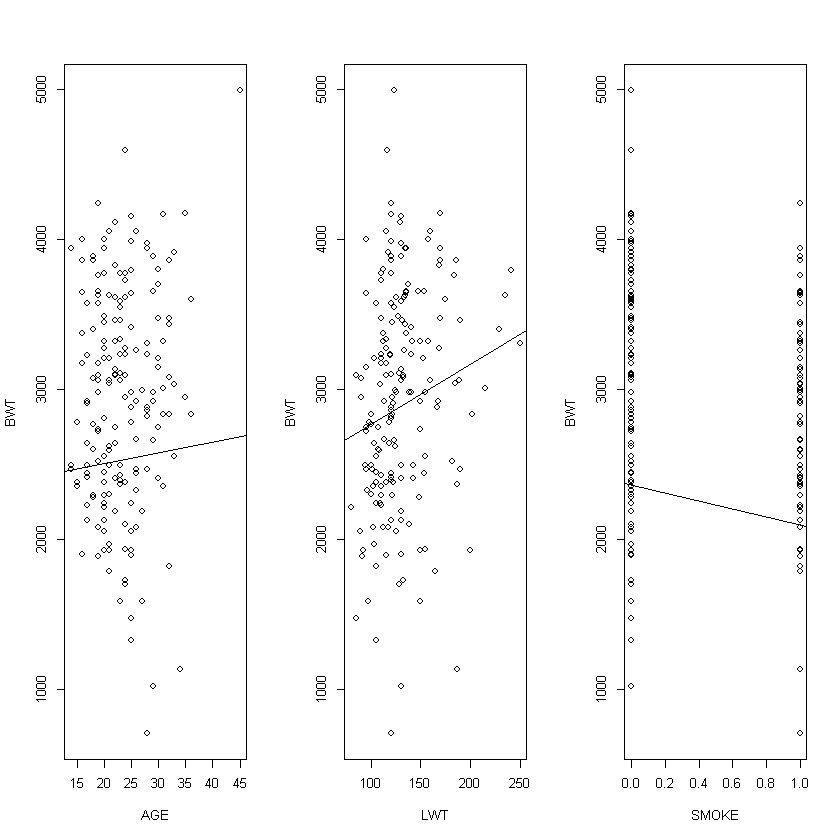

In [5]:
par(mfrow=c(1,3))
plot(BWT ~ AGE)
abline(coef(mod1)[1],coef(mod1)[2])
plot(BWT ~ LWT)
abline(coef(mod1)[1],coef(mod1)[3])
plot(BWT ~ SMOKE)
abline(coef(mod1)[1],coef(mod1)[4])

### Tests sur les paramètres
Les tests sur les divers paramètres sont obtenus grâce à la fonction **summary**.

In [6]:
summary(mod1)


Call:
lm(formula = BWT ~ ., data = naiss)

Residuals:
     Min       1Q   Median       3Q      Max 
-2069.89  -433.18    13.67   516.45  1813.75 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2362.720    300.687   7.858 3.11e-13 ***
AGE            7.093      9.925   0.715   0.4757    
LWT            4.019      1.720   2.337   0.0205 *  
SMOKE       -267.213    105.802  -2.526   0.0124 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 708.8 on 185 degrees of freedom
Multiple R-squared:  0.06988,	Adjusted R-squared:  0.05479 
F-statistic: 4.633 on 3 and 185 DF,  p-value: 0.003781


Les résultats fournis par **summary** se présentent de façon identique à ceux de la régression linéaire simple. On y retrouve les estimations des paramètres de régression dans la colonne **Estimate**.

Les valeurs réalisées des statistiques des tests de Student associés aux hypothèses
$H_0 : \beta_i = 0$ versus $H_l : \beta_i \neq 0$ se trouvent dans la colonne **t value**, les
p-valeurs associées dans la colonne **Pr(>|t|)**. **Residual standard error** fournit
l'estimation de $\sigma$  ainsi que le nombre de degrés de liberté associés $n - p - 1$.
On trouve enfin le coefficient de détermination $R^2$ (**Multiple R-squared**) ainsi
que la version ajustée $R^2_a$ (**Adjusted R-squared**). Enfin, on trouve la réalisation
du test de Fisher global (**F-statistic**) ainsi que sa p-valeur (**p-value**) associée.

Le test de Fisher global permet de tester l'apport global et conjoint de l'ensemble des variables explicatives présentes dans le modèle pour "expliquer" les variations de $Y$. L'hypothèse nulle ici est $H_0 : \beta_1= \dots =\beta_3 = 0$ (l'ensemble des $p$ variables explicatives n'apporte pas une information utile pour la prédiction de $Y$, sous le modèle linéaire). L'assertion d'intérêt est $H_1:$ au moins l'un des coefficients $\beta_j$ est significativement différent de zéro (au moins une des variables explicatives est associée à $Y$ après ajustement sur les autres variables explicatives).



### Analyse des résidus

L'instruction suivante produit un certain nombre de graphiques qui peuvent servir à analyser les résidus :
- Le premier graphique représente les résidus estimés : on peut vérifier si les résidus sont centrés et s'il n'y a pas de tendance particulière qui se dégage. Mais attentation, ce graphique ne permet pas la détection de valeurs aberrantes !
- Le deuxième graphique est le QQ-plot des résidus standardisés qui permet de vérifier l'hypothèse de normalité des résidus.
- Ensuite, le graphique (de la racine) des résidus standardisés permet de détecter les valeurs aberrantes et d'étudier encore la structure des résidus.
- Enfin, le dernier graphique représente les résidus standardisés en fonction du poids $h_{ii}$ des observations. En plus, il ajoute des bandes  correspondant à la distance de Cook's de $0.5$ et de $1$. (Dans notre exemple on ne voit pas ces bandes car les distances de Cook associées ne sont pas suffisamment élevées.)

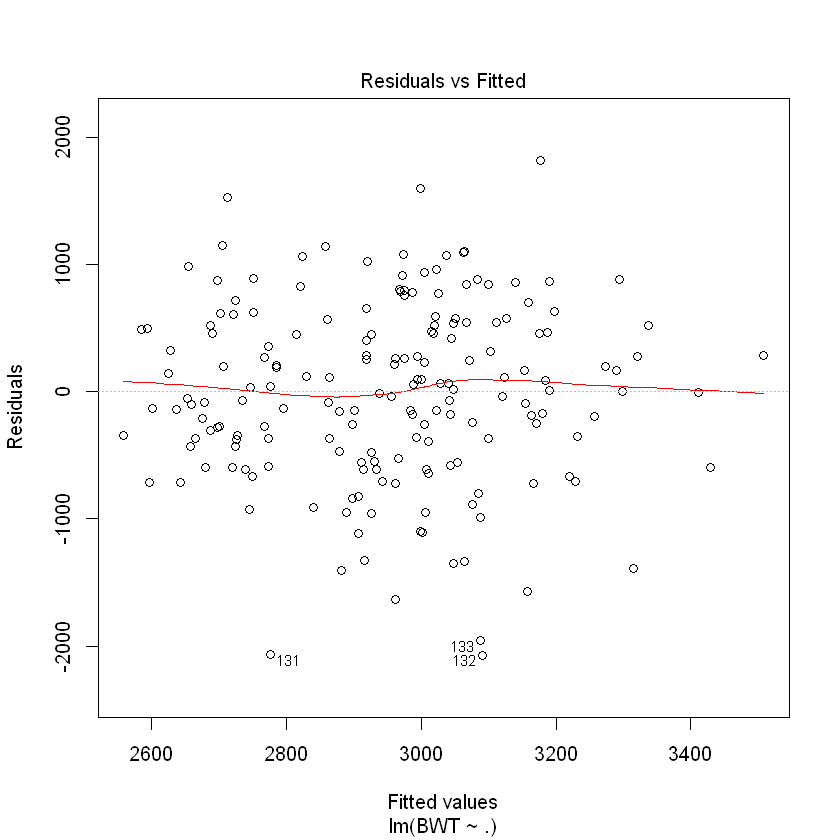

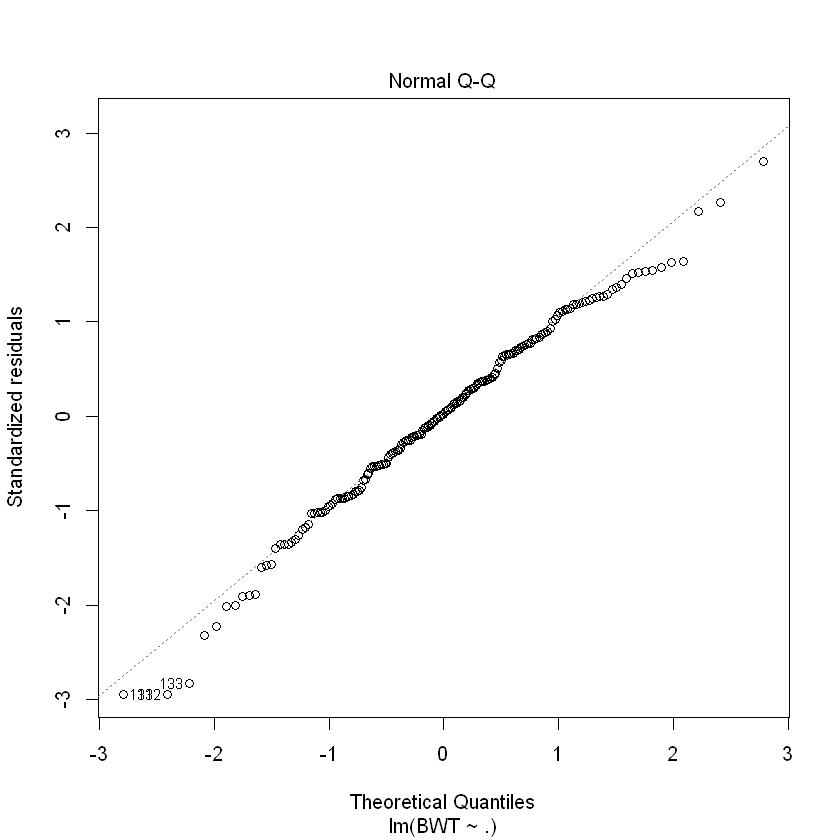

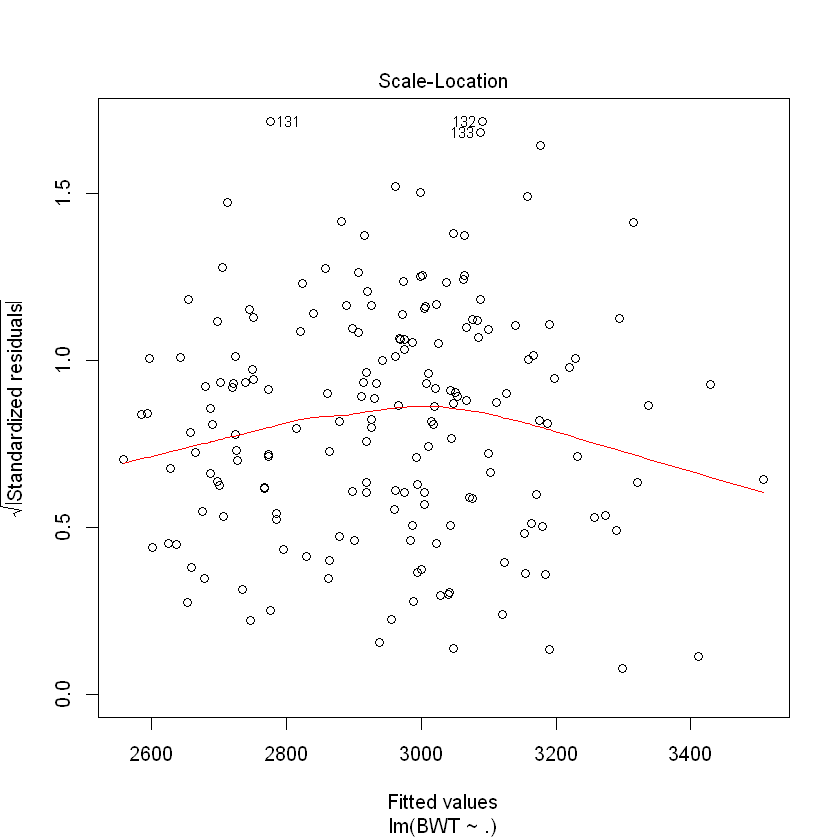

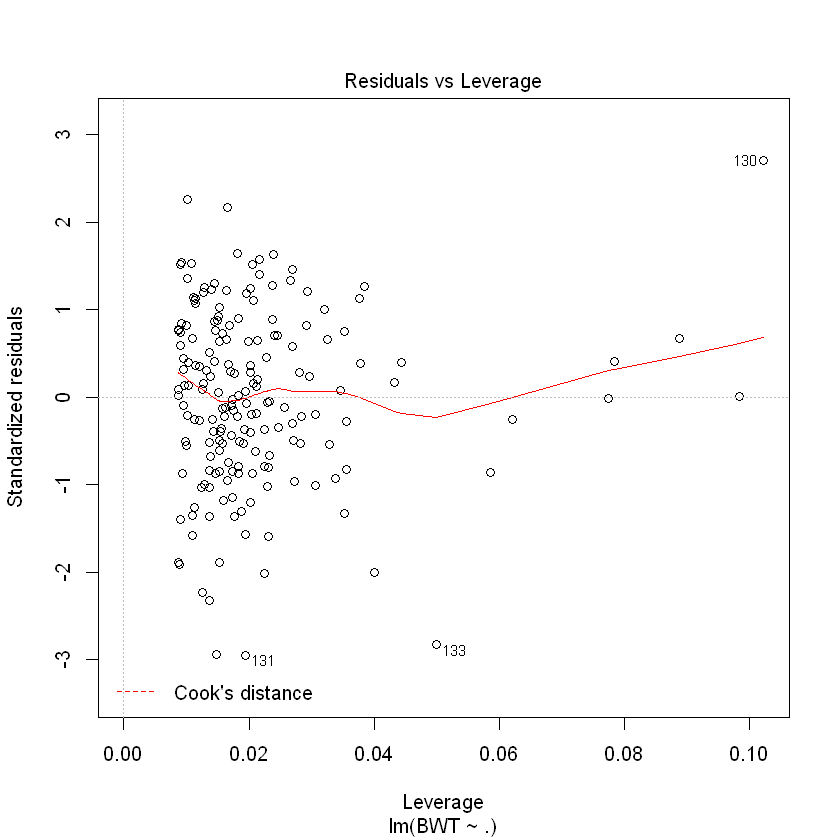

In [7]:
plot(mod1)

## Exercice 1

Nous reprenons les données de la concentration d'ozone du dernier TP que nous allons analyser davantage. 
Nous expliquons la concentration d'ozone **maxO3** par dix variables : 
- la température prévue par Météo France à 6h (**T6**), à midi (**T12**) et à 15h (**T15**),
- les nébulosités prévues à 9h (**Ne9**), à midi (**Ne12**) et à 15h (**Ne15**),
- la teneur maximum en ozone la veille (**maxO3v**) et enfin 
- une variable synthétique représentant le vent à 9h (**Vx9**), à midi (**Vx12**) et à 15h (**Vx15**).



1. Importer les données d'ozone et supprimer toutes les variables qualitatives du tableau.
2. Faites une première représentation graphique de l'ensemble des données et comparer aux corrélations entre les variables. Quelles sont les variables les plus (les moins) corrélées avec la concentration d'ozone ? Que dire de la corrélation des variables explicatives entre elles ?
3. Estimer les paramètres du modèle. Quelle est la conclusion du test de Fisher global ? Il y a t-il des variables dont le coefficient $\beta_j$ n'est pas siginificatif ? D'après vous, devrait-on les supprimer tous d'un seul coup ?
4. Effectuer une analyse des résidus : 
   - que dire de la normalité des residus ?
   - y a t-il des observations aberrantes dans le jeu de données (comparer aux seuils vu en cours)?
   - y a t-il des points levier (comparer aux seuils vu en cours) ? 
   - y a t-il des observations influentes en terme de la distance de Cook (comparer aux seuils vu en cours)?    
   - représenter les residus studentisés en fonction de différentes variables explicatives.


# Sélection de variables
Le jeu de données **ozone**  contient de nombreuses variables explicatives. Il est possible de faire un choix descendant (pas à pas) de variables à la main. On enlèverait la moins significative, soit **T9**, puis on recalculerait les estimations et ainsi de suite. Il existe en R un package qui traite
du choix de variables : le package **leaps**. La fonction **regsubsets** retourne, pour différents critères (bic, $R^2$ ajusté, Cp de Mallows, etc.), le meilleur modèle (si **nbest=1**) à 1 variable explicative, à 2 variables explicatives, ..., à **nvmax** variables explicatives. Au vu du graphique obtenu par les instructions suivantes, choisir les variables à conserver dans le modèle.


## Exercice 2
Appliquer la fonction **regsubsets** aux données afin de déterminer le meilleur modèle selon 
- le coefficient de détermination $R^2$,
- le coefficient de détermination ajusté $R^2_a$,
- le critère BIC

et commenter.

## Erreur quadratique moyenne

### Exercice 3

Les fichiers **Dapp.csv** et **Dtest.csv** contiennent deux échantillons représentant les mesures de 11 variables quantitatives $V_1,\dots,V_{10}$ et $Y$ sur $200$ individus (pour le premier fichier) et $100$ individus (pour le second). On souhaite expliquer la variable $Y$ par les variables $V_1,\dots,V_{10}$.

1. Importer les données dans 2 data-frames nommés **dapp** et **dtest**.
2. A partir de **dapp**, effectuer la régression linéaire de $Y$ sur $V_1,\dots,V_{10}$. On appellera ce modèle **modele1**.
3. A l'aide de la librairie **leaps**, sélectionner les variables qui vous semblent les plus pertinentes. Refaire une régression à partir des variables sélectionnées. On appellera ce modèle **modele2**.
4. Dans un vecteur **Y1** de longueur 100, stocker les valeurs de $Y$ prédites par le modèle **model1** pour chaque individu de l'échantillon test (issu du tableau **dtest**). Construire de même un vecteur **Y2** à partir de **modele2**.
5. Pour $j=1,2$ et $i=1,\dots,100$, on note $\hat Y_i^j$ la prévision par le modèle $j$ du $i$-ème individu de l'échantillon test, et $Y_i$ la valeur de $Y$ observée sur le $i$-ème individu de l'échantillon test. Calculer
$$\textrm{EQM}1=\frac{1}{100}\sum_{i=1}^{100}(\hat Y_i^1-Y_i)^2\hspace{1cm}\textrm{et}\hspace{1cm}\textrm{EQM}2=\frac{1}{100}\sum_{i=1}^{100}(\hat Y_i^2-Y_i)^2.$$
Interpréter en quelques mots.